In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import researchpy as rp

In [2]:
data = pd.read_excel("SampleDonorData.xlsx")

In [3]:
data.head(5)

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,...,PCT_OWNER_OCCUPIED,PEP_STAR,RECENT_STAR_STATUS,recency_freq_status,RECENT_CARD_RESPONSE_PROP,MONTHS_SINCE_LAST_PROM_RESP,LAST_GIFT_AMT,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
0,0,0,89765,77,0.0,0,S,20.0,U,M,...,72,0,0,A3,0.375,21.0,14,13,21,75
1,0,0,137263,137,0.0,0,C,23.0,H,M,...,97,1,0,A3,0.222,18.0,37,14,18,127
2,0,0,89966,137,2.0,0,C,23.0,H,M,...,78,1,0,A1,0.125,18.0,12,13,18,129
3,0,0,100147,137,2.0,0,S,21.0,H,M,...,79,1,0,A2,0.125,17.0,10,7,15,130
4,0,0,148098,77,2.0,0,S,20.0,H,F,...,42,1,0,A1,0.100,26.0,25,6,26,67


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 25 columns):
TARGET_B                       19372 non-null int64
TARGET_D                       19372 non-null int64
CONTROL_NUMBER                 19372 non-null int64
MONTHS_SINCE_ORIGIN            19372 non-null int64
DONOR_AGE                      14577 non-null float64
IN_HOUSE                       19372 non-null int64
URBANICITY                     19372 non-null object
CLUSTER_CODE                   18918 non-null float64
HOME_OWNER                     19372 non-null object
DONOR_GENDER                   19372 non-null object
INCOME_GROUP                   14980 non-null float64
PUBLISHED_PHONE                19372 non-null int64
WEALTH_RATING                  10562 non-null float64
MEDIAN_HOME_VALUE              19372 non-null int64
MEDIAN_HOUSEHOLD_INCOME        19372 non-null int64
PCT_OWNER_OCCUPIED             19372 non-null int64
PEP_STAR                       19372 non-null in

# Question 1 - Create a Histogram for a continuous variable


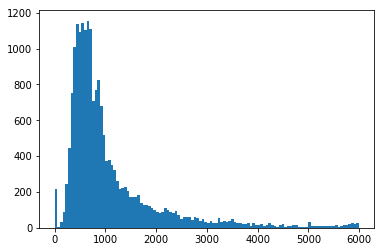

In [5]:
x = np.array(data['MEDIAN_HOME_VALUE'])
plt.hist(x,bins='auto')
plt.show()

In [6]:
y = x[np.nonzero(x)]

In [7]:
mean_HousePrice = np.mean(x)
print(mean_HousePrice)

1079.8719285566797


In [8]:
median_HousePrice = np.median(x)
print(median_HousePrice)

747.0


In [9]:
std_dev_HousePrice = np.std(x)
print(std_dev_HousePrice)

960.7286505665088


In [10]:
from scipy import stats

In [11]:
ConfInt = stats.norm.interval(0.05,loc=mean_HousePrice,scale=std_dev_HousePrice)
print(ConfInt)

(1019.6277304019221, 1140.1161267114371)


# Question 2 - Create a Correlation matrix for all continuous variables and Chi-square test of association for all categorical variables

In [12]:
data.columns

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'CLUSTER_CODE', 'HOME_OWNER',
       'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE', 'WEALTH_RATING',
       'MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'recency_freq_status',
       'RECENT_CARD_RESPONSE_PROP', 'MONTHS_SINCE_LAST_PROM_RESP',
       'LAST_GIFT_AMT', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT',
       'MONTHS_SINCE_FIRST_GIFT'],
      dtype='object')

<font size = 3, color=red> Based on the explanantion provided in data dictionary, some of the columns are read as 'int64' although they are categorical or ordinal variables. Converting them to categorical would be appropriate beofre proceeding for any analysis </font>

In [13]:
columns_as_category = ['TARGET_B','CONTROL_NUMBER','IN_HOUSE','CLUSTER_CODE','INCOME_GROUP','PUBLISHED_PHONE','WEALTH_RATING','RECENT_STAR_STATUS','PEP_STAR']

In [14]:
data[columns_as_category] = data[columns_as_category].astype('object')

In [15]:
num_var = data.select_dtypes(exclude='object')
cat_var = data.select_dtypes(include='object')

In [16]:
num_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 12 columns):
TARGET_D                       19372 non-null int64
MONTHS_SINCE_ORIGIN            19372 non-null int64
DONOR_AGE                      14577 non-null float64
MEDIAN_HOME_VALUE              19372 non-null int64
MEDIAN_HOUSEHOLD_INCOME        19372 non-null int64
PCT_OWNER_OCCUPIED             19372 non-null int64
RECENT_CARD_RESPONSE_PROP      19372 non-null float64
MONTHS_SINCE_LAST_PROM_RESP    19126 non-null float64
LAST_GIFT_AMT                  19372 non-null int64
NUMBER_PROM_12                 19372 non-null int64
MONTHS_SINCE_LAST_GIFT         19372 non-null int64
MONTHS_SINCE_FIRST_GIFT        19372 non-null int64
dtypes: float64(3), int64(9)
memory usage: 1.8 MB


In [17]:
for col in num_var.columns:
    num_var[col].fillna(num_var[col].mean(),inplace=True)

C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


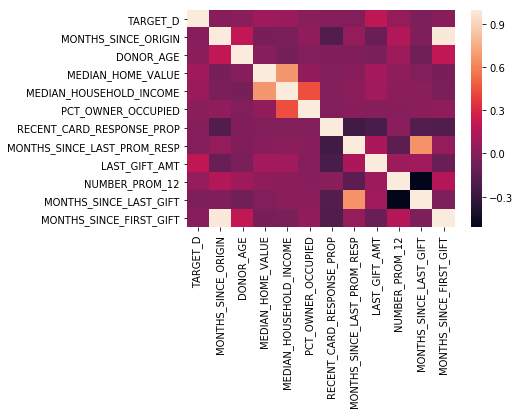

In [18]:
import seaborn as sns
corr = num_var.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [19]:
cat_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 13 columns):
TARGET_B               19372 non-null object
CONTROL_NUMBER         19372 non-null object
IN_HOUSE               19372 non-null object
URBANICITY             19372 non-null object
CLUSTER_CODE           18918 non-null object
HOME_OWNER             19372 non-null object
DONOR_GENDER           19372 non-null object
INCOME_GROUP           14980 non-null object
PUBLISHED_PHONE        19372 non-null object
WEALTH_RATING          10562 non-null object
PEP_STAR               19372 non-null object
RECENT_STAR_STATUS     19372 non-null object
recency_freq_status    19372 non-null object
dtypes: object(13)
memory usage: 1.9+ MB


In [20]:
for col in cat_var.columns:
    cat_var[col].fillna(cat_var[col].mode()[0],inplace=True)

C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [21]:
cat_var=cat_var.astype('category')

In [22]:
cat_var = cat_var.drop(columns=['CONTROL_NUMBER'],axis=1)

In [23]:
df_p = pd.DataFrame()  # Matrix of p-values
for x in cat_var.columns:
    for y in cat_var.columns:
        table, results = rp.crosstab(cat_var[x], cat_var[y], prop= 'col', test= 'chi-square')
        df_p.loc[x,y] = results.results[1]

In [24]:
df_p

,TARGET_B,IN_HOUSE,URBANICITY,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,PUBLISHED_PHONE,WEALTH_RATING,PEP_STAR,RECENT_STAR_STATUS,recency_freq_status
TARGET_B,0.0000,0.0000,0.0002,0.0000,0.0596,0.1738,0.0001,0.6542,0.0025,0.0000,0.0000,0.0000
IN_HOUSE,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2002,0.0000,0.0000,0.0000,0.0000
URBANICITY,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
CLUSTER_CODE,0.0000,0.0000,0.0000,0.0000,0.0000,0.0073,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
HOME_OWNER,0.0596,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0936,0.0011,0.0000
DONOR_GENDER,0.1738,0.0000,0.0000,0.0073,0.0000,0.0000,0.0000,0.0000,0.0454,0.0000,0.0086,0.0000
INCOME_GROUP,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
PUBLISHED_PHONE,0.6542,0.2002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3638,0.0003
WEALTH_RATING,0.0025,0.0000,0.0000,0.0000,0.0000,0.0454,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
PEP_STAR,0.0000,0.0000,0.0000,0.0000,0.0936,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


<font size=3, color=red> Almost all variables are strongly associated with each other. this would cause stron multicollinearity in the data set while running an OLS regression. </font>

In [25]:
data_join = pd.concat([num_var,cat_var],axis=1)

In [26]:
data_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 24 columns):
TARGET_D                       19372 non-null int64
MONTHS_SINCE_ORIGIN            19372 non-null int64
DONOR_AGE                      19372 non-null float64
MEDIAN_HOME_VALUE              19372 non-null int64
MEDIAN_HOUSEHOLD_INCOME        19372 non-null int64
PCT_OWNER_OCCUPIED             19372 non-null int64
RECENT_CARD_RESPONSE_PROP      19372 non-null float64
MONTHS_SINCE_LAST_PROM_RESP    19372 non-null float64
LAST_GIFT_AMT                  19372 non-null int64
NUMBER_PROM_12                 19372 non-null int64
MONTHS_SINCE_LAST_GIFT         19372 non-null int64
MONTHS_SINCE_FIRST_GIFT        19372 non-null int64
TARGET_B                       19372 non-null category
IN_HOUSE                       19372 non-null category
URBANICITY                     19372 non-null category
CLUSTER_CODE                   19372 non-null category
HOME_OWNER                     19372 non-

# Question 3 - Build a Linear Regression Model using a target and predictor variables 

In [27]:
#check correlation for dropping variables which are highly correlated

corr_matrix = data_join.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [28]:
to_drop

['MONTHS_SINCE_FIRST_GIFT']

In [29]:
data_join = data_join.drop(to_drop, axis=1)

In [32]:
X_data = data_join.drop(columns=['TARGET_B','TARGET_D'])
y_data = data_join['TARGET_D']

In [33]:
X_data_dum = pd.DataFrame(pd.get_dummies(X_data,drop_first= True))

In [34]:
from sklearn.model_selection import train_test_split
X_data_train,X_data_test, y_data_train, y_data_test = train_test_split(X_data_dum, y_data, shuffle = True, test_size = 0.3, random_state=42)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_data_train = scaler.fit_transform(X_data_train)
X_data_test = scaler.fit_transform(X_data_test)

C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


<font size=3, color=red>Linear Regression using the statsmodel, since the sklearnpackage does not give p-values for different paramaters for significance testing </font>

In [36]:
import statsmodels.api as sm
from scipy import stats

X_train_sm = sm.add_constant(X_data_train)
est = sm.OLS(y_data_train, X_train_sm)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               TARGET_D   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     9.299
Date:                Sat, 29 Jun 2019   Prob (F-statistic):          4.64e-139
Time:                        15:12:50   Log-Likelihood:                -48944.
No. Observations:               13560   AIC:                         9.811e+04
Df Residuals:                   13451   BIC:                         9.893e+04
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.9794      8.382      8.826      0.0

In [37]:
values = pd.DataFrame(est2.pvalues)
values.reset_index(level=0, inplace=True)
values = values.rename(index=str, columns={"index": "Col_coef", 0:"p_val"})
values = values.drop(values.index[[0]])
values.index = np.arange(1, len(values) + 1)

In [38]:
X = pd.DataFrame(X_data_dum.columns)
X = X.rename(index=str, columns={0: "Col_Name"})
X.index = np.arange(1, len(X) + 1)

In [39]:
data_check = pd.concat([X,values],axis=1)

In [40]:
y = data_check[data_check.p_val < 0.05]
y

,Col_Name,Col_coef,p_val
3,MEDIAN_HOME_VALUE,x3,4.951309e-03
8,LAST_GIFT_AMT,x8,8.767217e-120
10,MONTHS_SINCE_LAST_GIFT,x10,2.716752e-02
12,URBANICITY_C,x12,2.411858e-09
13,URBANICITY_R,x13,2.429351e-09
14,URBANICITY_S,x14,5.441396e-10
15,URBANICITY_T,x15,2.455993e-02
16,URBANICITY_U,x16,9.544491e-08
28,CLUSTER_CODE_13.0,x28,2.868203e-02
42,CLUSTER_CODE_27.0,x42,1.176577e-02


<font size=3, color=red> Selecting important feature variables which are important for prediction </font> 


MEDIAN_HOME_VALUE  
LAST_GIFT_AMT  
MONTHS_SINCE_LAST_GIFT  
DONOR_GENDER  
PEP_STAR  

p-Values for others are very insignificant causing a very low R^2 value

<font size=3, color=red> Improving the Model further: </font>

1. Using kNN Regressor
2. Using LASSO Regression
3. Using Decision Tree Regression 

In [41]:
from sklearn import linear_model

lin_mod = linear_model.LinearRegression(fit_intercept = True)
lin_mod.fit(X_data_train, y_data_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
print(lin_mod.score(X_data_train, y_data_train))
print(lin_mod.score(X_data_test, y_data_test))

0.06827989758462483
-0.14183140849230114


# Question 4 - Compare the Linear Regression Model versus other Machine Learning Methods

##### kNN Regressor

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knnScoring =  'r2'
param_grid = {"n_neighbors":[1,3,5,10,15]}
knnr = KNeighborsRegressor()

## Perform the grid search over the parameters
grid_knnr = GridSearchCV(estimator = knnr, param_grid = param_grid, cv = 10, scoring = knnScoring, n_jobs=-1)
grid_knnr.fit(X_data_train, y_data_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 3, 5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [44]:
print(grid_knnr.best_estimator_.n_neighbors)
print(grid_knnr.best_score_)

15
-0.04764627883178117


In [45]:
print(grid_knnr.score(X_data_train, y_data_train))
print(grid_knnr.score(X_data_test, y_data_test))

0.08976103179601569
-0.04869523875968795


##### LASSO Regressor

In [46]:
from sklearn.linear_model import Lasso
param_grid = {"alpha":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0,.00001]}
grid_lasso = GridSearchCV(Lasso(), param_grid = param_grid, cv = 10, scoring = 'r2')

grid_lasso.fit(X_data_train, y_data_train)

C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\vijay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coo

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.02, 0.005, 0.002, 0.001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [47]:
print(grid_lasso.best_score_)
print(grid_lasso.best_params_)

0.036928163186890454
{'alpha': 0.005}


In [48]:
print(grid_lasso.score(X_data_train, y_data_train))
print(grid_lasso.score(X_data_test, y_data_test))

0.06161085772916497
-0.10222307390994145


##### Decision Tree Regressor

In [49]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_data_train, y_data_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [50]:
print(tree.score(X_data_train, y_data_train))
print(tree.score(X_data_test, y_data_test))

1.0
-3.6791283561022805


In [51]:
report_table = [['LR', ' ', lin_mod.score(X_data_train, y_data_train), lin_mod.score(X_data_test, y_data_test)]]
report_table = report_table + [['knnr', 'k = 15', grid_knnr.score(X_data_train, y_data_train), grid_knnr.score(X_data_test, y_data_test)]]
report_table = report_table + [['Lasso', 'alpha = 0.005', grid_lasso.score(X_data_train, y_data_train), grid_lasso.score(X_data_test, y_data_test)]]
report_table = report_table + [['DecisionTree', ' ', tree.score(X_data_train, y_data_train), tree.score(X_data_test, y_data_test)]]

In [52]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy'])
report = report.set_index('Model name')
report

,Model parameter,Train accuracy,Test accuracy
Model name,,,
LR,,0.068280,-0.141831
knnr,k = 15,0.089761,-0.048695
Lasso,alpha = 0.005,0.061611,-0.102223
DecisionTree,,1.000000,-3.679128


Best performing model is the kNN Regressor since it's train and test score are high. Decision Tree regressor is a highly over model. LASSO can be used to nderstand the feature selection and then the selected columns can be passed through kNN regressor for even better results. Lastly, log-transformation of the dataset will highly help in increasing the overall accuracy.